## Obesity Dataset:

- The data consist of the estimation of **obesity levels** in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining **17 attributes and 2111 records**.

- **The attributes related with eating habits are:** 
1. Frequent consumption of high caloric food (FAVC). 
2. Frequency of consumption of vegetables (FCVC).
3. Number of main meals (NCP).
4. Consumption of food between meals (CAEC)
5. Consumption of water daily (CH20)
6. Consumption of alcohol (CALC). 

- **The attributes related with the physical condition are:**
1. Calories consumption monitoring (SCC)
2. Physical activity frequency (FAF)
3. Time using technology devices (TUE)
4. Transportation used (MTRANS)

|  Column  |             Meaning       |
|----------|---------------------------|
|  Gender  |      Gender (1=Female or 0=Male)       |
|  Age  |         ages between 14 and 61        |
|  Height  |             Height       |
|  Weight  |             Weight       |
|  family_history_with_overweight  |             family member suffered or suffers from overweight (1=Yes, 0=No)    |
|  FAVC  |              Frequent consumption of high caloric food (0=Yes, 1=No)       |
|  FCVC  |            Frequency of consumption of vegetables (1, 2, or 3)      |
|  NCP  |             Number of main meals (1, 2, 3, or 4)      |
|  CAEC  |          Consumption of food between meals (1=No, 2=Sometimes, 3=Frequently, 4=Always)      |
|  SMOKE  |         Smoker or not (0=Yes, 1=No)      |
|  CH2O  |        Consumption of water daily       |
|  SCC  |         Calories consumption monitoring (0=Yes, 1=No)      |
|  FAF  |         Physical activity frequency (0, 1, 2, or 3)       |
|  TUE  |        Time using technology devices (0, 1, or 2)      |
|  CALC  |       Consumption of alcohol (1=No, 2=Sometimes, 3=Frequently or 4=Always)      |
|  MTRANS  |          Transportation used (automobile, motorbike, bike, public transportation, or walking)     |
|  NObeyesdad  |             Obesity level deducted (1=Insufficient Weight, 2=Normal Weight, 3=Overweight Level I, 4=Overweight Level II, 5=Obesity Type I, 6=Obesity Type_II, 7=Obesity Type III)    |

**Data Label**

- NObesity values are:

• Underweight Less than 18.5                                        
• Normal 18.5 to 24.9                                      
• Overweight 25.0 to 29.9                                      
• Obesity I 30.0 to 34.9                                          
• Obesity II 35.0 to 39.9                                        
• Obesity III Higher than 40

## Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go

from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Read Data:

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
train.shape

(20758, 18)

In [6]:
test.shape

(13840, 17)

In [7]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [9]:
for i in train.columns:
    print(
        i,': Null Count is',train[i].isnull().sum(),
          '\n',train[i].unique(),
          '\n','*'*50
    )

id : Null Count is 0 
 [    0     1     2 ... 20755 20756 20757] 
 **************************************************
Gender : Null Count is 0 
 ['Male' 'Female'] 
 **************************************************
Age : Null Count is 0 
 [24.443011 18.       20.952737 ... 25.746113 38.08886  33.852953] 
 **************************************************
Height : Null Count is 0 
 [1.699998 1.56     1.71146  ... 1.791366 1.672594 1.536819] 
 **************************************************
Weight : Null Count is 0 
 [ 81.66995   57.        50.165754 ... 152.063947  79.5       80.615325] 
 **************************************************
family_history_with_overweight : Null Count is 0 
 ['yes' 'no'] 
 **************************************************
FAVC : Null Count is 0 
 ['yes' 'no'] 
 **************************************************
FCVC : Null Count is 0 
 [2.         1.880534   3.         2.679664   2.919751   1.99124
 1.397468   2.636719   1.         1.392665   2.20396

**Note:** 
- We have columns that should be **categorical** but the values in it are **continous**, so we will **round** it like:
1. **Age:** should be int.
2. **Height, Weight and CH2O:** round to closest to 2 numbers.
3. **FCVC, NCP, TUE and FAF:** should round to int.

**Check Datatype**

In [10]:
train.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

- Datatypes are correct.

**Check for null values**

In [11]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- There is missing in data.

**Check for range of data**

In [12]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


- All values in the correct range.

**Check for uniqueness**

In [13]:
train.drop(columns='id', axis=1, inplace=True)

In [14]:
train.duplicated().sum()

0

- There is no duplication in data.

- **Numerical Columns:** Age, Height, Weight.
- **Categorical Columns:** The rest.

**Categorical Columns**

In [15]:
train['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

- We have **7 categories** in the **label**.

**Split training data into train and validation**

In [16]:
train_data, test_data = train_test_split(train, test_size=.2, random_state=42)

In [17]:
print(train_data.shape)
print(test_data.shape)

(16606, 17)
(4152, 17)


## EDA:

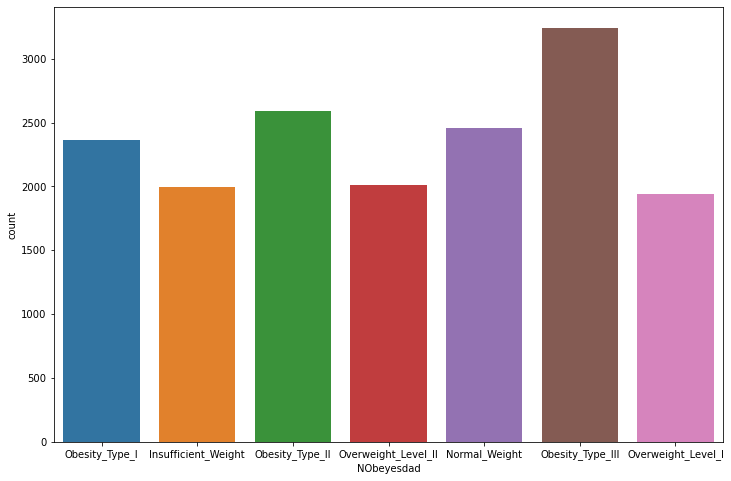

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='NObeyesdad');

- **Note:** There is imbalance between classes in target column.

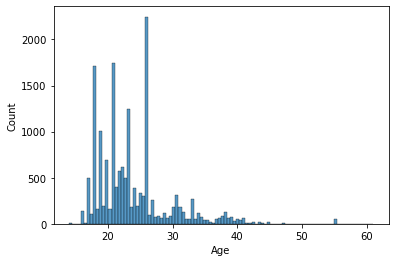

In [19]:
sns.histplot(data=train_data, x='Age');

- There is **skewness** in age **column**

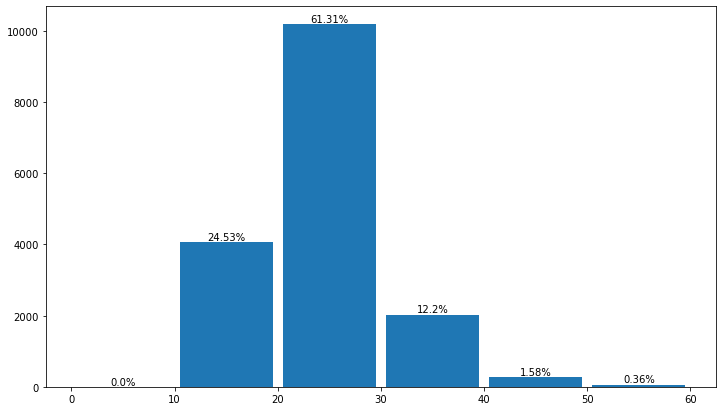

In [20]:
plt.figure(figsize=(12, 7))

freq, bins, patches = plt.hist(train_data['Age'], bins=[0, 10, 20, 30, 40, 50, 60], rwidth=.9)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / train_data.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 10, 20, 30, 40, 50, 60]);

- Nearly **61%** of people in the data have age from 20 to 30 (young).

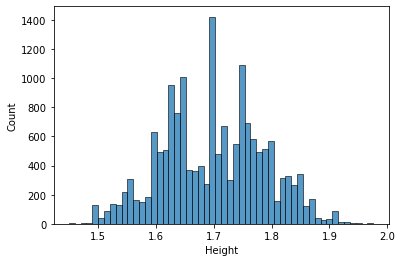

In [21]:
sns.histplot(data=train_data, x='Height');

- **Height** is approximately normal distribution.

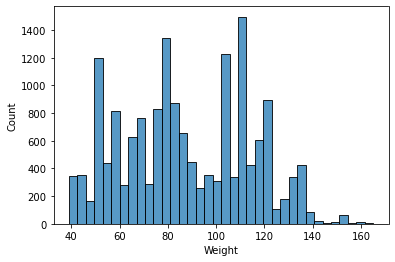

In [22]:
sns.histplot(data=train_data, x='Weight');

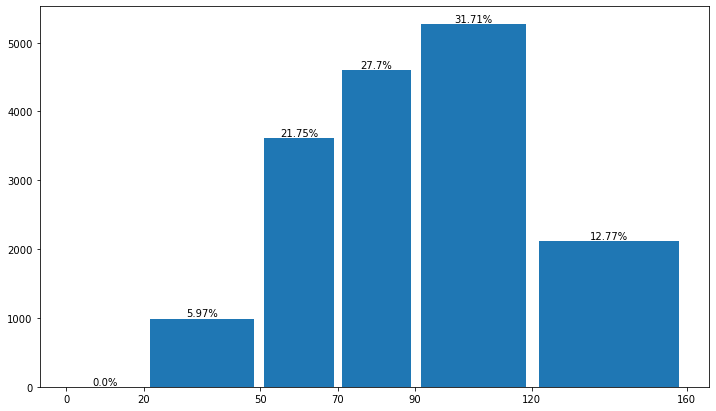

In [23]:
plt.figure(figsize=(12, 7))

freq, bins, patches = plt.hist(train_data['Weight'], bins=[0, 20, 50, 70, 90, 120, 160], rwidth=.9)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / train_data.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 20, 50, 70, 90, 120, 160]);

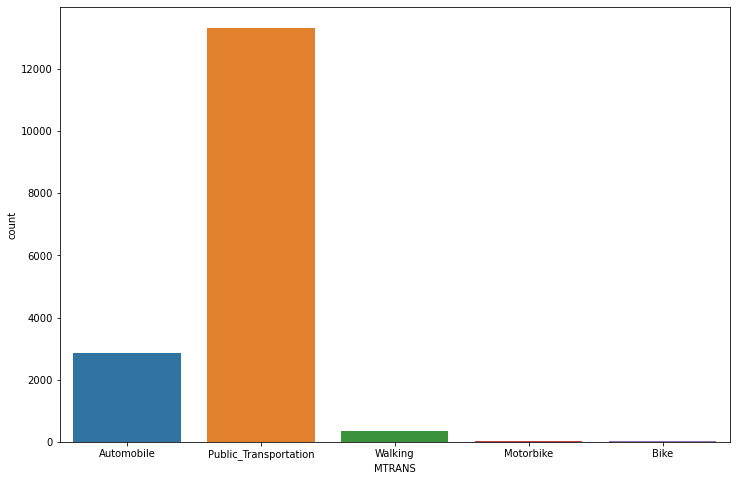

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='MTRANS');

- The **most** used one is **Public Transportation** and the **least** one is **Bike**.

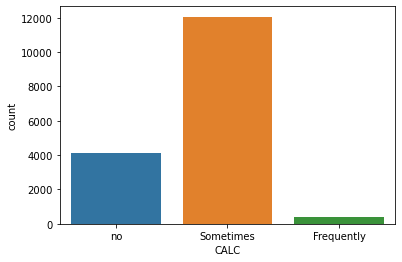

In [25]:
sns.countplot(data=train_data, x='CALC');

- **Note:** The **most** of people is **sometimes** using alcohol and the **least** ones who is using **frequantly**.

#### What is the range of ages in each category in the target

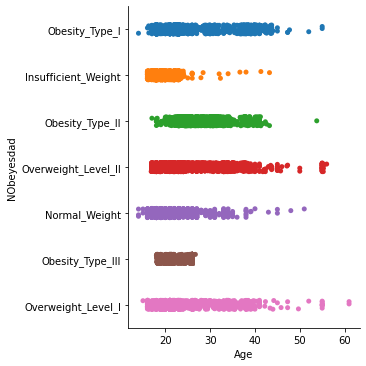

In [26]:
sns.catplot(data=train_data, x='Age', y='NObeyesdad');

- **Insufficient Weight** and **Obesity Type |||** appear nearly for ages from 18 to 30.

#### What is the relation between weight and target

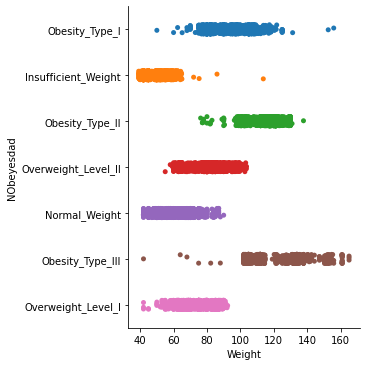

In [27]:
sns.catplot(data=train_data, x='Weight', y='NObeyesdad');

- Insufficient weight have low weights from 40 to 80.
- Obesity Type | have high weights from 70 to 130
- Obesity Type || have higher weights from 80 to 140
- Obesity Type ||| have higher weights from 100 to 170

#### What is the relation between height and target

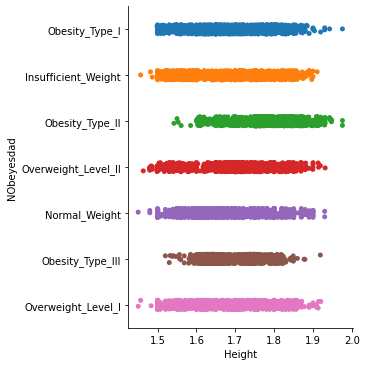

In [28]:
sns.catplot(data=train_data, x='Height', y='NObeyesdad');

- Here almost Heights have all categories.

#### Does CALC affect the target column

#### Does CH2O affect the target column

#### How many people in each cluster of weight drink ?

In [29]:
pivot_mean_df = pd.pivot_table(train_data, values='CH2O', index='NObeyesdad', aggfunc='mean')
pivot_mean_df = pivot_mean_df.reset_index()

In [30]:
fig = px.bar(pivot_mean_df, x='NObeyesdad', y='CH2O', title='Mean of drinking water by Obesity Type')
fig.show()

#### What is the highest calorie consumption class?

In [31]:
grouped_counts = train_data.groupby(['NObeyesdad', 'FAVC']).size().reset_index(name='counts')

In [32]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='FAVC', title='Count of FAVC (Yes/No) in Each Weight Group')
fig.show()

#### What is the mean to eat NCP for each cluster ?

In [33]:
pivot_mean_df = pd.pivot_table(train_data, values='NCP', index='NObeyesdad', aggfunc='mean')
pivot_mean_df = pivot_mean_df.reset_index()

In [34]:
fig = px.bar(pivot_mean_df, x='NObeyesdad', y='NCP', title='Mean of eating meal in day by Obesity Type')
fig.show()

#### What is the height cluster smoking?

In [35]:
grouped_counts = train_data.groupby(['NObeyesdad', 'SMOKE']).size().reset_index(name='counts')

In [36]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='SMOKE', title='Count of SMOKE (Yes/No) in Each NObeyesdad type')
fig.show()

#### What is the most cluster not enough eating the main male?

In [37]:
grouped_counts = train_data.groupby(['NObeyesdad', 'CAEC']).size().reset_index(name='counts')

In [38]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='CAEC', title='Count of CAEC (Yes/No) in Each Weight Group')
fig.show()

#### What is the most class Consumption of alcohol?

In [39]:
grouped_counts = train_data.groupby(['NObeyesdad', 'CALC']).size().reset_index(name='counts')

In [40]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='CALC', title='Count of CALC (Yes/No) in Each Weight Group')
fig.show()

#### What is the Transportation that people prefre to use and why?

In [41]:
grouped_counts = train_data.groupby(['NObeyesdad', 'MTRANS']).size().reset_index(name='counts')

In [42]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='MTRANS', 
             title='Count of people prefre to use in Each Weight Group')
fig.show()

#### What is the mean of the time that each cluster do TUE?

In [43]:
pivot_mean_df = pd.pivot_table(train_data, values='TUE', index='NObeyesdad', aggfunc='mean')
pivot_mean_df = pivot_mean_df.reset_index()

In [44]:
fig = px.bar(pivot_mean_df, x='NObeyesdad', y='TUE', title='Mean of time using technology in day by group age')
fig.show()

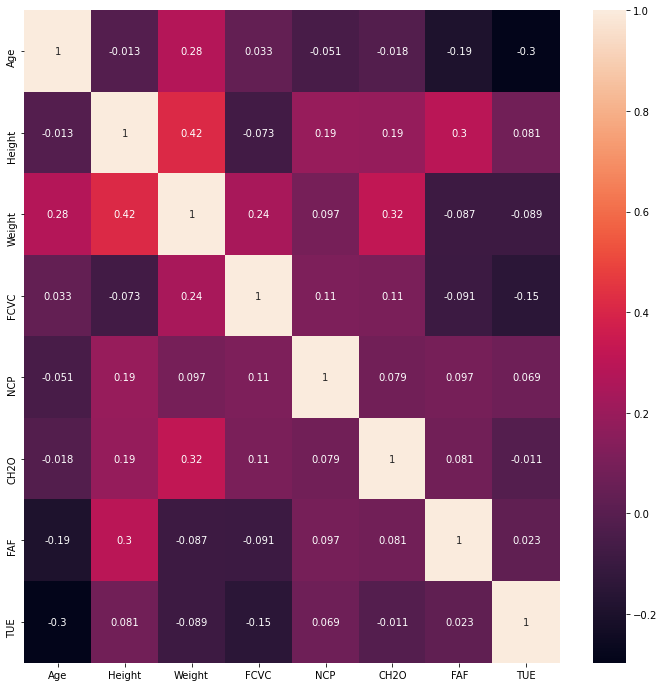

In [45]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_data.corr(), annot=True);

- There is **no strong correlation** between 2 columns and this is good for model to learn variability in data.

In [46]:
train_data.sample()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
18741,Male,38.895069,1.7,79.843221,yes,yes,3.0,2.938135,Sometimes,no,1.718569,no,2.834373,0.0,Sometimes,Automobile,Overweight_Level_II


- Distribution of Numerical Values and do bins and make conclusion from it.
- Categories for each categorical column.

## Data Preparation:

**Correct columns values**

In [97]:
train_data['Age'] = train_data['Age'].astype(int)
train_data[['Height', 'Weight', 'CH2O']] = train_data[['Height', 'Weight', 'CH2O']].round(2)
train_data[['FCVC', 'NCP', 'TUE', 'FAF']] = train_data[['FCVC', 'NCP', 'TUE', 'FAF']].round().astype(int)

**Split Data into X and y**

In [98]:
X = train_data.drop(columns='NObeyesdad', axis=1)
y = train_data['NObeyesdad']

In [99]:
print(X.shape)
print(y.shape)

(16606, 16)
(16606,)


**Encode String to Numerical**

- Features

In [100]:
categorical = X[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']]

In [101]:
categorical.shape

(16606, 8)

In [102]:
# handle_unknown='use_encoded_value', unknown_value=-1

In [103]:
encoder = OrdinalEncoder()

In [104]:
encoder.fit(categorical)

OrdinalEncoder()

In [105]:
X[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']] = encoder.transform(X[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']])

In [106]:
X.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

- Target

In [107]:
target_encoder = LabelEncoder()
target_encoder.fit(y)

LabelEncoder()

In [108]:
target = target_encoder.transform(y)

In [109]:
y = target

In [110]:
y

array([2, 0, 3, ..., 5, 4, 2])

**Outliers**

## PCA

In [65]:
pca = PCA(n_components=2)

In [66]:
pca_data = pca.fit_transform(X)

In [275]:
pca.explained_variance_ratio_

array([0.95259412, 0.04203774])

In [277]:
pca_data = pd.DataFrame(data=pca_data, columns=["PCA1", "PCA2"])
pca_data.head()

,PCA1,PCA2
0,8.623719,-6.803154
1,-33.113255,0.226620
2,33.851449,-4.625331
3,-6.917302,18.037712
4,7.006352,-1.140973


## Test Data

In [45]:
categorical = test[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']]

In [46]:
categorical.shape

(13840, 8)

In [115]:
def encode_with_unknown(encoder, data):
    encoded_data = encoder.transform(data)
    unseen_mask = ~np.isin(data, encoder.categories_)
    encoded_data[unseen_mask] = -1 
    return encoded_data

## Split data into train and test:

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## SVC Model:

In [112]:
svc = SVC()

In [113]:
svc.fit(X_train, y_train)

SVC()

**Training**

In [114]:
y_pred_train = svc.predict(X_train)

<AxesSubplot:>

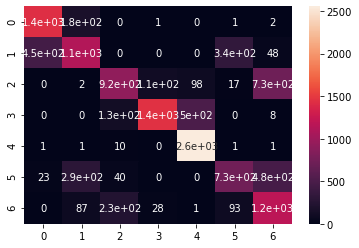

In [115]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [116]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1615
           1       0.67      0.57      0.62      1957
           2       0.69      0.49      0.57      1874
           3       0.91      0.69      0.79      2085
           4       0.81      0.99      0.89      2568
           5       0.62      0.47      0.53      1561
           6       0.48      0.73      0.58      1624

    accuracy                           0.71     13284
   macro avg       0.71      0.69      0.69     13284
weighted avg       0.72      0.71      0.70     13284



**Testing**

In [117]:
y_pred_test = svc.predict(X_test)

<AxesSubplot:>

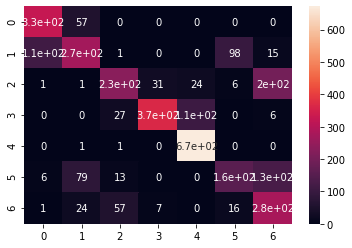

In [118]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [119]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       384
           1       0.63      0.54      0.58       499
           2       0.70      0.47      0.56       493
           3       0.91      0.72      0.80       506
           4       0.84      1.00      0.91       674
           5       0.57      0.41      0.47       382
           6       0.44      0.73      0.55       384

    accuracy                           0.69      3322
   macro avg       0.69      0.67      0.67      3322
weighted avg       0.71      0.69      0.69      3322



## Hyperparameter Tuning:

## Decision Tree Model:

In [76]:
dt = DecisionTreeClassifier()

In [77]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Training**

In [78]:
y_pred_train = dt.predict(X_train)

<AxesSubplot:>

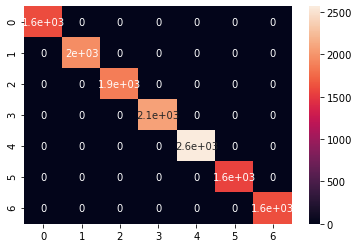

In [79]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [80]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1957
           2       1.00      1.00      1.00      1874
           3       1.00      1.00      1.00      2085
           4       1.00      1.00      1.00      2568
           5       1.00      1.00      1.00      1561
           6       1.00      1.00      1.00      1624

    accuracy                           1.00     13284
   macro avg       1.00      1.00      1.00     13284
weighted avg       1.00      1.00      1.00     13284



**Testing**

In [81]:
y_pred_test = dt.predict(X_test)

<AxesSubplot:>

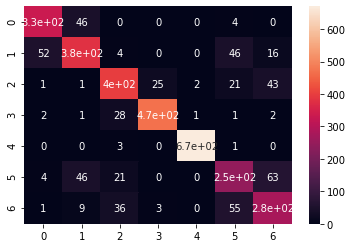

In [82]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [83]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       384
           1       0.79      0.76      0.78       499
           2       0.81      0.81      0.81       493
           3       0.94      0.93      0.94       506
           4       1.00      0.99      0.99       674
           5       0.66      0.65      0.65       382
           6       0.69      0.73      0.71       384

    accuracy                           0.84      3322
   macro avg       0.82      0.82      0.82      3322
weighted avg       0.84      0.84      0.84      3322



In [84]:
print(dt.max_features)
print(dt.max_depth)
print(dt.min_samples_split)
print(dt.min_samples_leaf)

None
None
2
1


## Hyperparameter Tuning:

In [85]:
max_features = ['auto', 'sqrt']
max_depth = [2, 8, 12, 25, 30]
min_samples_split = [2, 5]
min_samples_leaf = [3, 5]

In [86]:
param_grid = {
    'max_features': max_features, 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

In [87]:
dt_model = DecisionTreeClassifier()

In [88]:
grid = GridSearchCV(dt_model, param_grid=param_grid, cv=10, n_jobs=-1)

In [89]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, 12, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 5]})

In [90]:
grid.score(X_train, y_train)

0.8800813008130082

In [91]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5)

In [92]:
grid.best_score_

0.8248254303897304

In [93]:
grid.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [94]:
pred = grid.predict(X_test)

In [95]:
accuracy_score(y_test, pred)

0.8245033112582781

In [96]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       384
           1       0.76      0.76      0.76       499
           2       0.79      0.84      0.81       493
           3       0.92      0.91      0.92       506
           4       1.00      0.97      0.98       674
           5       0.66      0.62      0.64       382
           6       0.66      0.65      0.66       384

    accuracy                           0.82      3322
   macro avg       0.81      0.81      0.81      3322
weighted avg       0.82      0.82      0.82      3322



**Focus on values that get best score**

In [301]:
max_features = ['auto', 'sqrt']
max_depth = [25, 30, 32, 35]
min_samples_split = [4, 5, 7]
min_samples_leaf = [3, 5, 7]

In [302]:
param_grid = {
    'max_features': max_features, 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

In [303]:
dt_model = DecisionTreeClassifier()

In [304]:
grid = GridSearchCV(dt_model, param_grid=param_grid, cv=10, n_jobs=-1)

In [305]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [25, 30, 32, 35],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [4, 5, 7]})

In [306]:
grid.score(X_train, y_train)

0.8505721168322794

In [307]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=30, max_features='auto', min_samples_leaf=7,
                       min_samples_split=4)

In [308]:
grid.best_score_

0.7849298435276093

In [309]:
grid.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 4}

In [310]:
pred = grid.predict(X_test)

In [311]:
accuracy_score(y_test, pred)

0.7784467188440698

In [312]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       384
           1       0.65      0.63      0.64       499
           2       0.76      0.78      0.77       493
           3       0.91      0.92      0.92       506
           4       0.96      0.95      0.95       674
           5       0.61      0.60      0.60       382
           6       0.64      0.62      0.63       384

    accuracy                           0.78      3322
   macro avg       0.76      0.76      0.76      3322
weighted avg       0.78      0.78      0.78      3322



## Random Forest Model:

In [313]:
rf = RandomForestClassifier()

In [314]:
rf.fit(X_train, y_train)

RandomForestClassifier()

**Training**

In [315]:
y_pred_train = rf.predict(X_train)

<AxesSubplot:>

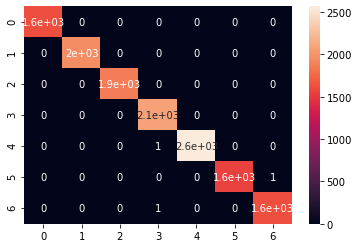

In [316]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [317]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1957
           2       1.00      1.00      1.00      1874
           3       1.00      1.00      1.00      2085
           4       1.00      1.00      1.00      2568
           5       1.00      1.00      1.00      1561
           6       1.00      1.00      1.00      1624

    accuracy                           1.00     13284
   macro avg       1.00      1.00      1.00     13284
weighted avg       1.00      1.00      1.00     13284



**Testing**

In [318]:
y_pred_test = rf.predict(X_test)

<AxesSubplot:>

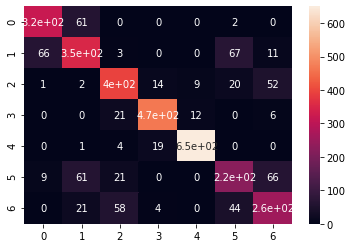

In [319]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [320]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       384
           1       0.71      0.71      0.71       499
           2       0.79      0.80      0.79       493
           3       0.93      0.92      0.92       506
           4       0.97      0.96      0.97       674
           5       0.63      0.59      0.61       382
           6       0.66      0.67      0.66       384

    accuracy                           0.80      3322
   macro avg       0.78      0.78      0.78      3322
weighted avg       0.80      0.80      0.80      3322



In [321]:
print(rf.n_estimators)
print(rf.max_features)
print(rf.max_depth)
print(rf.min_samples_split)
print(rf.min_samples_leaf)
print(rf.bootstrap)

100
auto
None
2
1
True


## Hyperparameter Tuning:

In [322]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 8, 12, 25, 30]
min_samples_split = [2, 5]
min_samples_leaf = [3, 5]
bootstrap = [True, False]

In [323]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features, 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [324]:
rf_model = RandomForestClassifier()

In [325]:
grid = GridSearchCV(rf_model, param_grid=param_grid, cv=10, n_jobs=-1)

In [326]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 8, 12, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [327]:
grid.score(X_train, y_train)

0.8729298404095152

In [328]:
grid.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5)

In [329]:
grid.best_score_

0.8092442569374564

In [330]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [331]:
pred = grid.predict(X_test)

In [332]:
accuracy_score(y_test, pred)

0.8160746538229982

In [333]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       384
           1       0.71      0.73      0.72       499
           2       0.81      0.82      0.81       493
           3       0.94      0.92      0.93       506
           4       0.96      0.96      0.96       674
           5       0.68      0.60      0.64       382
           6       0.68      0.71      0.69       384

    accuracy                           0.82      3322
   macro avg       0.80      0.80      0.80      3322
weighted avg       0.82      0.82      0.82      3322



**Focus on values that get best score**

In [334]:
n_estimators = [int(x) for x in np.linspace(start=60, stop=90, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [26, 28, 30, 32, 34]
min_samples_split = [2, 3, 4]
min_samples_leaf = [4, 5, 6]
bootstrap = [True, False]

In [335]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features, 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [336]:
rf_model = RandomForestClassifier()

In [337]:
grid = GridSearchCV(rf_model, param_grid=param_grid, cv=10, n_jobs=-1)

In [338]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [26, 28, 30, 32, 34],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [60, 63, 66, 70, 73, 76, 80, 83, 86,
                                          90]})

In [339]:
grid.score(X_train, y_train)

0.870897320084312

In [340]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 32,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 73}

In [341]:
pred = grid.predict(X_test)

In [342]:
accuracy_score(y_test, pred)

0.8154726068633353

In [343]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       384
           1       0.72      0.72      0.72       499
           2       0.80      0.82      0.81       493
           3       0.94      0.92      0.93       506
           4       0.96      0.97      0.96       674
           5       0.69      0.62      0.65       382
           6       0.67      0.69      0.68       384

    accuracy                           0.82      3322
   macro avg       0.80      0.80      0.80      3322
weighted avg       0.81      0.82      0.81      3322

